# Welcome to this Tutorial!

In this tutorial I will explain how the `FloorplantoBlenderlib` project actually works.
I will illustrate how functions are called and show changes as visually as possible.
If you have any questions about functionallities, please create an issue on the repo and I will make sure to answer!

Please enjoy and have fun!

**@Grebtsew**

# Requirements
If you have come this far, you either run on docker or locally. However some python libraries are needed for these scripts to run. Make sure all python packages from the main `/requirements.txt` file is installed!

# Import FloorplantoBlenderlib
First of we need to be able to import the FloorplantoBlenderlib (**Ftbl**)

In [7]:
# Add outer folder 
import sys
sys.path.append("..") # Adds higher directory to python modules path.

# Import library
from FloorplanToBlenderLib import *

# Other necessary libraries
import cv2 # for image gathering
import numpy as np

# for visualize
from PIL import Image
from IPython.display import display


## Input Image
Now we need an example image to work with.

Input image: ![input](../Images/Examples/example.png)

# Detect Contours
So, we do now have an input image and can start coding scripts using **Ftbl**. 
Firstly we want to get the outer contours of the floorplan, in order to create a floor or roof of our 3d object.

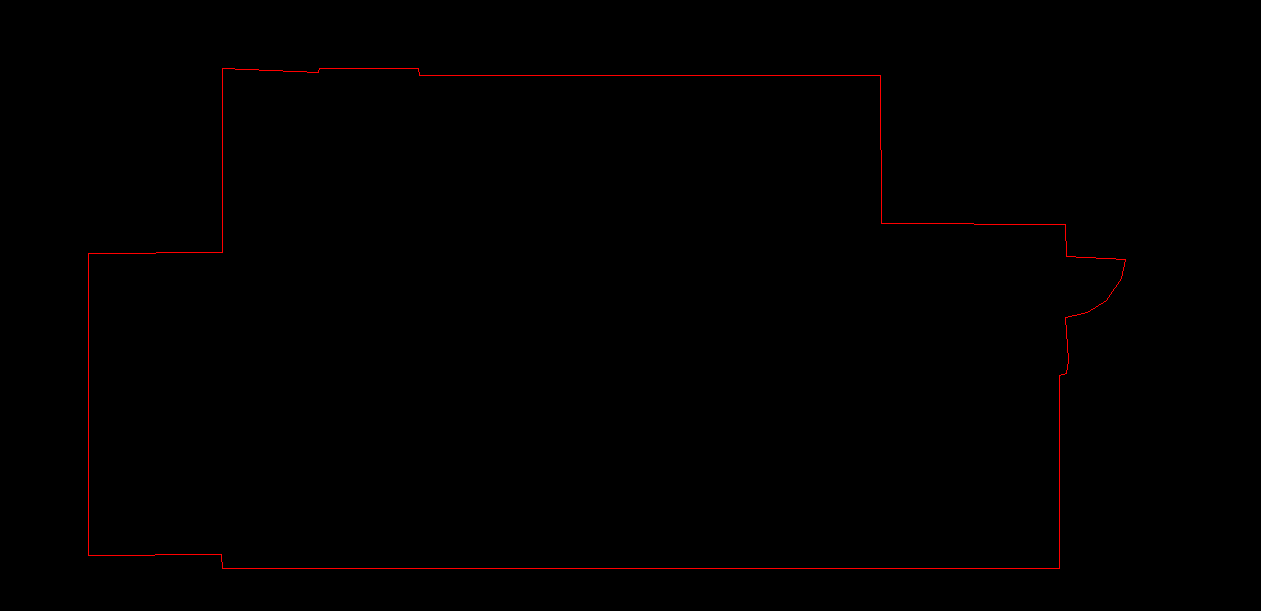

In [8]:

img_path = "../Images/Examples/example.png"

# Read floorplan image
img = cv2.imread(img_path)

# Create blank image
height, width, channels = img.shape
blank_image = np.zeros((height,width,3), np.uint8)

# Grayscale image
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# detect outer Contours (simple floor or roof solution), paint them red on blank_image
contour, c_img = detect.outer_contours(gray, blank_image, color=(255,0,0))

# Display
display(Image.fromarray(blank_image))

# Auto Rescale Image
Okey, so we have now started scripting and already detected a fancy floor/roof of the floorplan.
Now we will look closer at a problem I had for a long time, where Images that were too big or too small couldn't really be used. To solve this, we want to scale the images up or down. To know how much an image should be scaled we calculate the average corner-distance of objects we suspect to be walls. Then scale image to match the prefered wall-size for optimal detections.

This functionality is now a setting in the `config.ini` file. By setting `rescale_image = True` it will be activated and try to automaticly rescale too large or too small images. We use a default calibration image that can be replaced to achive other results.

After a rescale the floor/roof has to be recalculated with the new image. The outer contour detection will then serve as threshold of upcoming detections.

# Detect Walls

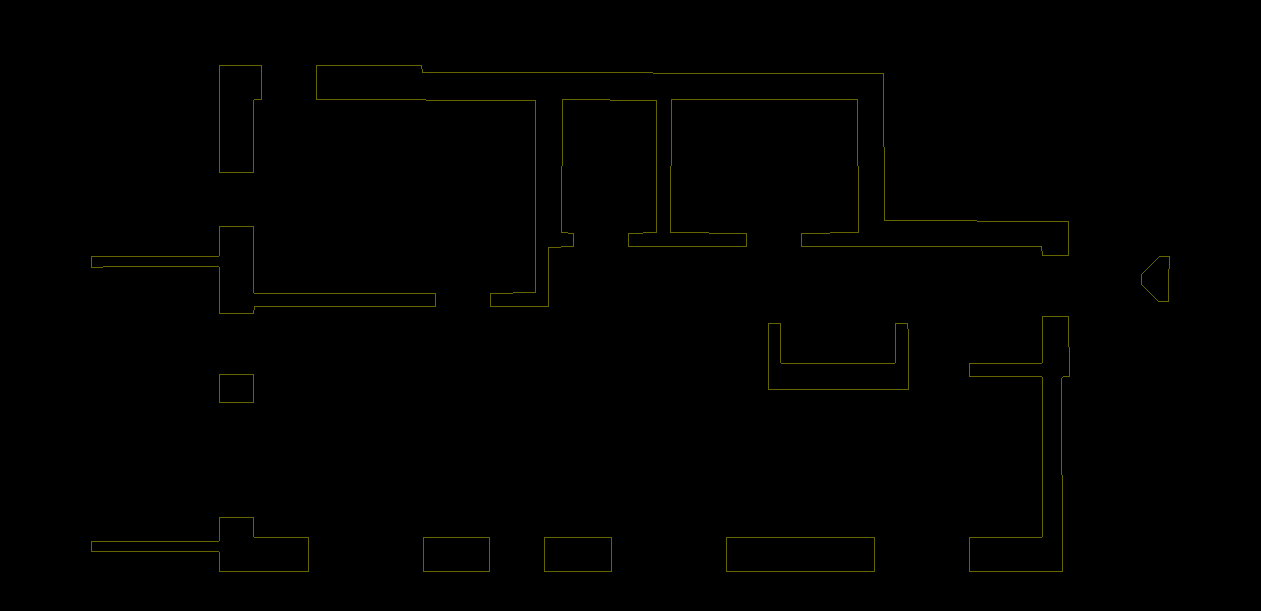

In [9]:
# Create new blank image
blank_image = np.zeros((height,width,3), np.uint8)

# Perform filter on image
wall_img = detect.wall_filter(gray)

"""
Detect Wall
"""
# detect walls
boxes, w_img = detect.precise_boxes(wall_img, blank_image)

display(Image.fromarray(blank_image))


# Remove walls outside of outer contour

Next up we perform a filter to remove all walls that is positioned outside of the outer contour.

# Detect Rooms

Next we detect rooms.

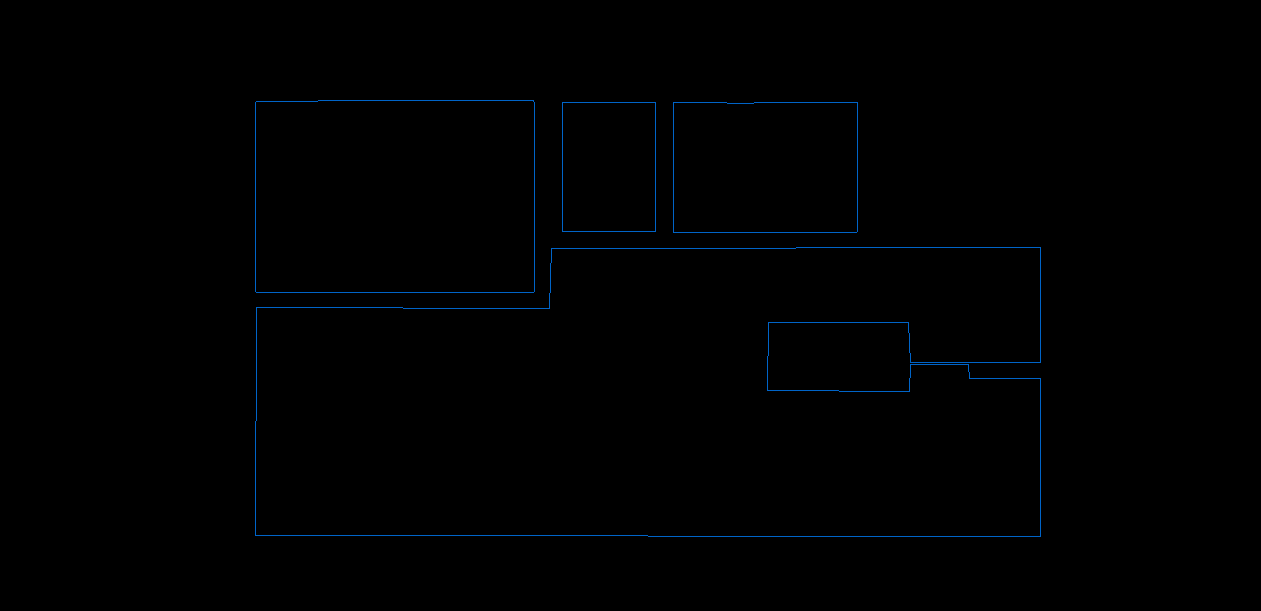

In [10]:
# Create new blank image
blank_image = np.zeros((height,width,3), np.uint8)

gray = ~wall_img

# Find rooms
rooms, colored_rooms = detect.find_rooms(gray)

gray_rooms = cv2.cvtColor(colored_rooms, cv2.COLOR_BGR2GRAY)

boxes, blank_image = detect.precise_boxes(
    gray_rooms, blank_image, color=(0, 100, 200)
)

# Display
display(Image.fromarray(blank_image))

# Detect Doors

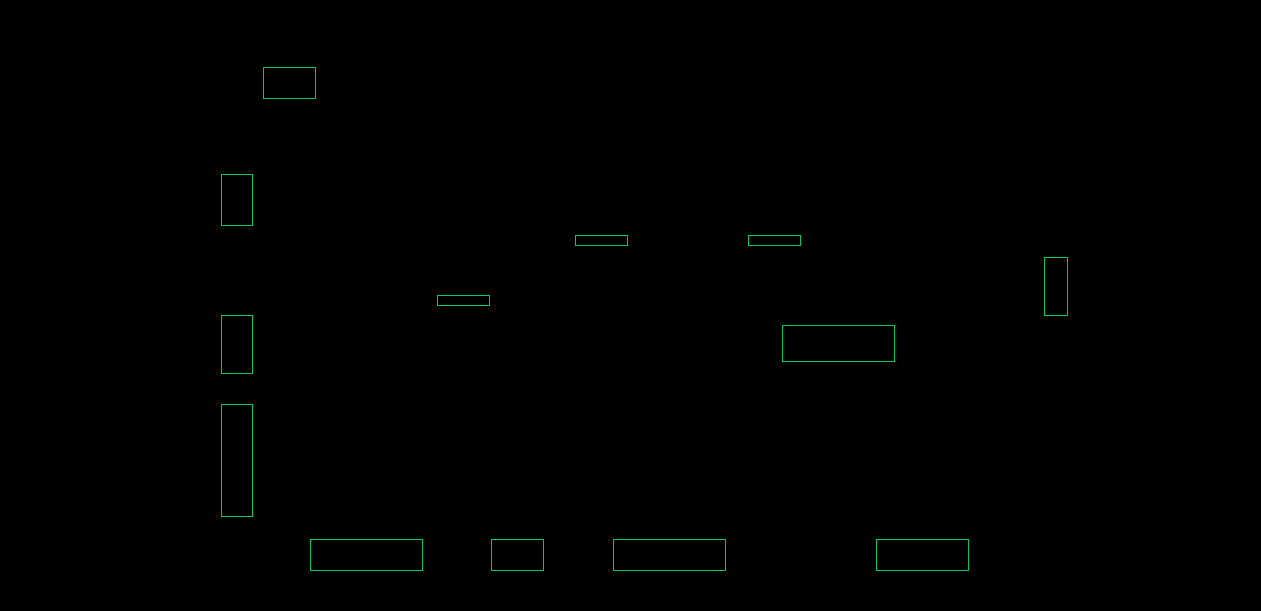

In [12]:
# Create new blank image
blank_image = np.zeros((height,width,3), np.uint8)

doors, colored_doors = detect.find_details(gray.copy())
gray_details = cv2.cvtColor(colored_doors, cv2.COLOR_BGR2GRAY)
boxes, blank_image = detect.precise_boxes(
    gray_details, blank_image, color=(0, 200, 100)
)

# Display
display(Image.fromarray(blank_image))

In [ ]:
# Detect doors

# TODO: write text and use images from existing script!
# TODO: add text

In [ ]:
# Detect windows

# TODO: add

# Generate storage data files

In [ ]:
# Under construction...

# Generate Blender file

In [ ]:
# Under construction...

# Generate multi level floorplan

In [ ]:
# Under construction...

# Reformat blender project

In [ ]:
# Under construction...

# AR

In [ ]:
# Under construction...

# Unity